# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing/Loading the dataset

In [ ]:
df = pd.read_csv("Data.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,281425.06,C310276293,0.00,0.0,C1831477404,299995.48,247063.16,0,0
1,1,TRANSFER,18561.23,C1494277749,0.00,0.0,C1629911510,192136.35,15375.37,0,0
2,1,TRANSFER,39069.42,C1091107430,0.00,0.0,C22805895,238390.23,651524.92,0,0
3,1,TRANSFER,63186.93,C521342639,0.00,0.0,C1123629720,150527.05,46393.85,0,0
4,1,TRANSFER,419757.69,C2114629072,0.00,0.0,C998351292,559328.89,1015132.48,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2636,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1,0
2637,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1,0
2638,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1,0
2639,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2641 non-null   int64  
 1   type            2641 non-null   object 
 2   amount          2641 non-null   float64
 3   nameOrig        2641 non-null   object 
 4   oldbalanceOrg   2641 non-null   float64
 5   newbalanceOrig  2641 non-null   float64
 6   nameDest        2641 non-null   object 
 7   oldbalanceDest  2641 non-null   float64
 8   newbalanceDest  2641 non-null   float64
 9   isFraud         2641 non-null   int64  
 10  isFlaggedFraud  2641 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 227.1+ KB


In [ ]:
df['isFraud'].value_counts()

0    1499
1    1142
Name: isFraud, dtype: int64

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2641.000000,2.641000e+03,2.641000e+03,2.641000e+03,2.641000e+03,2.641000e+03,2641.000000,2641.0
mean,21.441121,5.761542e+05,1.095526e+06,5.978885e+05,6.903365e+05,9.909810e+05,0.432412,0.0
std,29.337193,1.451956e+06,2.127746e+06,1.679177e+06,2.151393e+06,2.556171e+06,0.495505,0.0
min,1.000000,6.420000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,7.269740e+03,1.370400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,1.000000,7.938685e+04,1.157116e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
75%,41.000000,3.633788e+05,1.026209e+06,4.869947e+04,2.801579e+05,5.958335e+05,1.000000,0.0
max,95.000000,1.000000e+07,1.990000e+07,1.020000e+07,3.300000e+07,3.460000e+07,1.000000,0.0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Data Visualization

<Axes: xlabel='type', ylabel='count'>

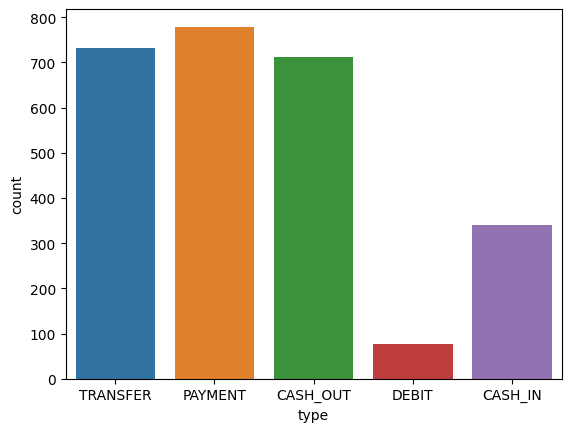

In [ ]:
sns.countplot(x='type',  data=df)

# Retain 6 features and target variable

In [ ]:
df = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud"]]

In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 0
Integer variables: 1
Float variables: 5


<Axes: >

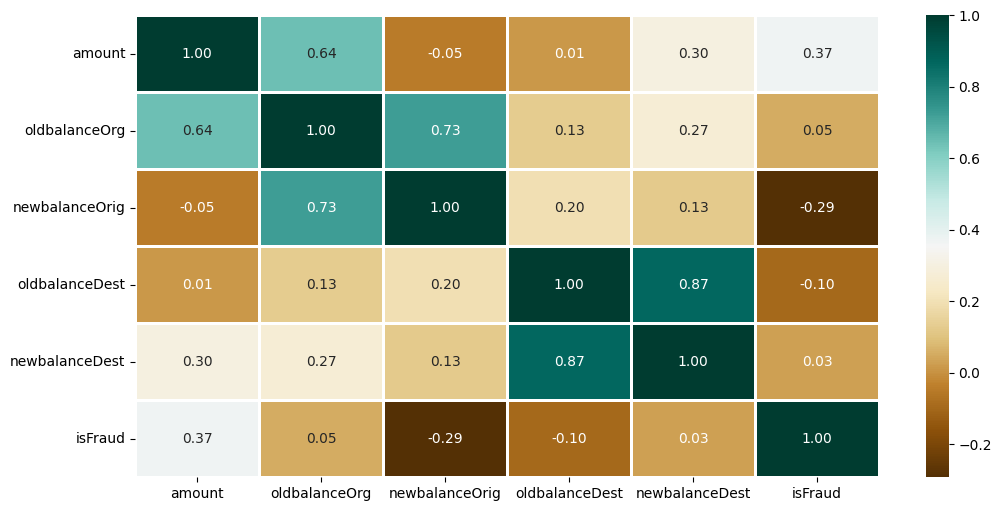

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

# Handling outliers

<Axes: >

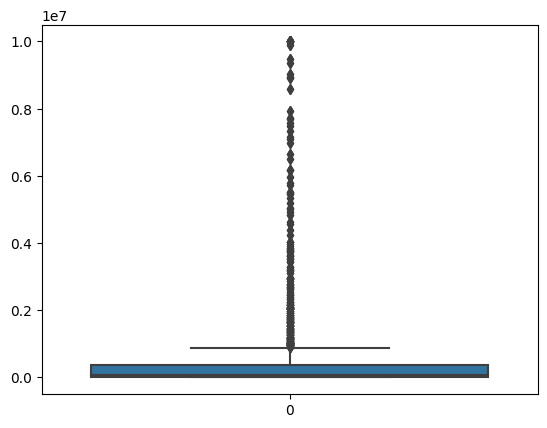

In [ ]:
sns.boxplot(df["amount"])

In [ ]:
from scipy import stats
print(stats.mode(df["amount"]))
print(np.mean(df["amount"]))

ModeResult(mode=10000000.0, count=14)
576154.1787504733


In [ ]:
q1 = np.quantile(df['amount'],0.25)

q3 = np.quantile(df['amount'],0.75)

IQR = q3-q1

upper_bound = q3+(1.5*IQR)

lower_bound = q1-(1.5*IQR)

print('q1:',q1)

print('q3:',q3)

print('IQR:',IQR)

print('Upper Bound :', upper_bound)

print('Lower Bound :',lower_bound)

print('Skewed data :',len(df[df['amount']>upper_bound]))

print('Skewed data :',len(df[df['amount']<lower_bound]))

q1: 7269.74
q3: 363378.75
IQR: 356109.01
Upper Bound : 897542.265
Lower Bound : -526893.775
Skewed data : 383
Skewed data : 0


In [ ]:
def transformationPlot(feature):

  plt.figure(figsize=(12,5))

  plt.subplot(1,2,1)

  sns.histplot(feature)

  plt.subplot(1,2,2)

  stats.probplot(feature, plot=plt)



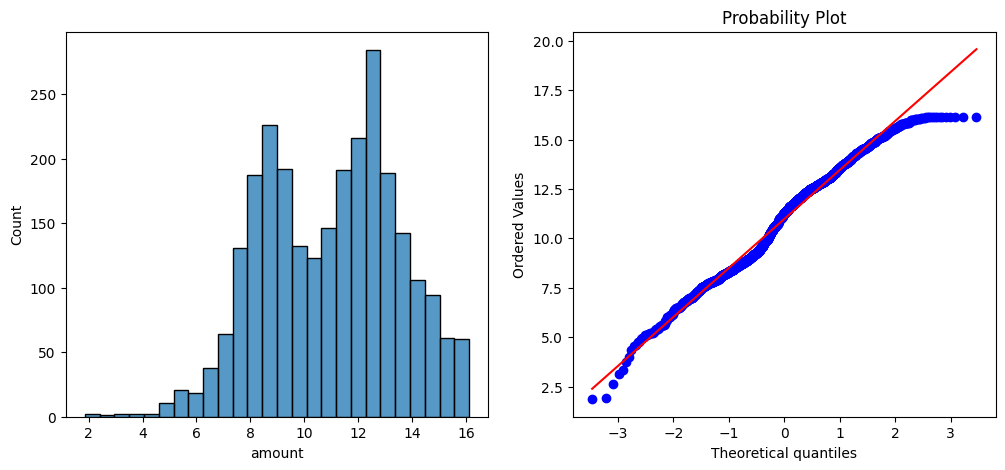

In [ ]:
transformationPlot(np.log(df['amount']))

# X and Y split

In [ ]:
X = df.drop('isFraud',axis=1)

In [ ]:
y = df['isFraud']

# Scaling the data

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_scale = sc.fit_transform(X)
# print(X_scale)

# Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Model Building and Evaluation

# Training the SVM model

In [ ]:
# from sklearn.svm import SVC
# Csvm = SVC(kernel = 'linear', random_state = 42)
# Csvm.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# y_pred = Csvm.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

# Applying k-Fold Cross Validation

In [ ]:
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = Csvm, X = X_train, y = y_train, cv = 10)
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# Training the Naive Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB
Cnb = GaussianNB()
Cnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = Cnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[445   7]
 [196 145]]


0.7440100882723834

# Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Cnb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.08 %
Standard Deviation: 2.29 %


# Training the Decision Tree Classification model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Cdt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
Cdt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = Cdt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[446   6]
 [  9 332]]


0.9810844892812106

# Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Cdt, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.08 %
Standard Deviation: 1.26 %


# Training the Random Forest Classification model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Crs = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
Crs.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = Crs.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[443   9]
 [  6 335]]


0.9810844892812106

# Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Crs, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.78 %
Standard Deviation: 1.18 %


# Training the XGBoost Model

In [ ]:
from xgboost import XGBClassifier
Cxgb = XGBClassifier()
Cxgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = Cxgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[443   9]
 [  9 332]]


0.9773013871374527

# Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Cxgb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.56 %
Standard Deviation: 1.36 %


In [ ]:
import pickle
pickle.dump(Cxgb,open('fraud.pkl','wb'))